In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
sns.set()

In [2]:
df = pd.read_csv("./Downloads/e-commerce.csv",encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#convert CustomerID(Float) to (String) then remove .0 in the last of string
df['CustomerID'] = df['CustomerID'].apply(lambda x : str(x)[:-2])

In [5]:
#We Need To Deal With Those Missing Values Later
df[~df['CustomerID'].str.contains('\d+')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,n,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,n,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,n,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,n,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,n,United Kingdom


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


**May be We Could start to Ask some Questions to get some insights:**<pre>
1 - Which Items Sold More Often
2 - According to each Country, What is the (Average) Invoice
3 - From Where The Most Data Comes
4 - Which Stock_Code Used the most 
5 - what is the most Year we made money
6 - On average what is the best month Which we do a great job in it

In [7]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [8]:
#We know that there is a NULL Values in a (Description) from df.info() , We Need to handle it first
df['Description'].fillna('Missings' , inplace = True)

In [9]:
df[df['Description'].str.contains('\w+')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


**If U Look at above Line of cood ,u will notice that we figure out an important thing which is , If u look at the shape above u will notice that is(541854,8) ,But we know that the Original Shape is(541909,8) , so by doing some regex we figure out that there is a Nulls Values different from what we filled it later**

In [10]:
# if we want to look at it :
df[~df['Description'].str.contains('\w+')].head()
# Great Job till now , now let's make this value(?) also = missing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,n,United Kingdom
21518,538090,20956,?,-723,12/9/2010 14:48,0.0,n,United Kingdom
38261,539494,21479,?,752,12/20/2010 10:36,0.0,n,United Kingdom
43662,540100,22837,?,-106,1/4/2011 16:53,0.0,n,United Kingdom
50806,540558,21258,?,-29,1/10/2011 10:04,0.0,n,United Kingdom


In [11]:
df['Description'] = df['Description'].apply(lambda x : x.replace('?',"Missings"))
df[~df['Description'].str.contains('\w+')].head()
# Great, it is worked

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [12]:
# To Avoid a Problem ,Which is may be we have MILK and milk , and it is obvious we do not need to treat it 
# as a 2 different products, so We Need to handle it 
df['Description'] = df['Description'].apply(lambda x : x.lower())
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850,United Kingdom


In [13]:
# Weird Output , Let's Check what is happens here
df.groupby('Description')['Quantity'].sum().sort_values()[:5]

Description
printing smudges/thrown away   -28258
unsaleable, destroyed.         -15644
missings                       -14993
check                          -12164
damaged                         -9173
Name: Quantity, dtype: int64

In [14]:
# Let us remove every row has a UnitPrice = 0 
df[df['Description']=='missings'].sort_values(by = 'Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
341601,566768,16045,missings,-3667,9/14/2011 17:53,0.0,n,United Kingdom
323458,565304,16259,missings,-3167,9/2/2011 12:18,0.0,n,United Kingdom
270886,560600,18007,missings,-2834,7/19/2011 17:04,0.0,n,United Kingdom
156350,550133,85099F,missings,-1092,4/14/2011 13:49,0.0,n,United Kingdom
285886,561927,22740,missings,-1060,8/1/2011 12:49,0.0,n,United Kingdom
...,...,...,...,...,...,...,...,...
82795,543258,84611B,missings,1287,2/4/2011 16:06,0.0,n,United Kingdom
74615,542505,79063D,missings,2560,1/28/2011 12:04,0.0,n,United Kingdom
115807,546139,84988,missings,3000,3/9/2011 16:35,0.0,n,United Kingdom
220843,556231,85123A,missings,4000,6/9/2011 15:04,0.0,n,United Kingdom


In [15]:
# simply i got every row has price = 0 ,then i threw it away and took the rest
df = df[~(df['UnitPrice']==0)].sort_values(by = 'UnitPrice')

In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,adjust bad debt,1,8/12/2011 14:52,-11062.060,n,United Kingdom
299983,A563186,B,adjust bad debt,1,8/12/2011 14:51,-11062.060,n,United Kingdom
359871,568200,PADS,pads to match all cushions,1,9/25/2011 14:58,0.001,16198,United Kingdom
279045,561226,PADS,pads to match all cushions,1,7/26/2011 10:13,0.001,15618,United Kingdom
361741,568375,BANK CHARGES,bank charges,1,9/26/2011 17:01,0.001,13405,United Kingdom
...,...,...,...,...,...,...,...,...
15016,C537630,AMAZONFEE,amazon fee,-1,12/7/2010 15:04,13541.330,n,United Kingdom
43703,C540118,AMAZONFEE,amazon fee,-1,1/5/2011 9:57,16453.710,n,United Kingdom
43702,C540117,AMAZONFEE,amazon fee,-1,1/5/2011 9:55,16888.020,n,United Kingdom
524602,C580605,AMAZONFEE,amazon fee,-1,12/5/2011 11:36,17836.460,n,United Kingdom


In [17]:
# i don't know what is mean by product = negative values 
# i will remove it because i think it is just a noisy data
df = df.iloc[2:]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
359871,568200,PADS,pads to match all cushions,1,9/25/2011 14:58,0.001,16198,United Kingdom
279045,561226,PADS,pads to match all cushions,1,7/26/2011 10:13,0.001,15618,United Kingdom
361741,568375,BANK CHARGES,bank charges,1,9/26/2011 17:01,0.001,13405,United Kingdom
157195,550193,PADS,pads to match all cushions,1,4/15/2011 9:27,0.001,13952,United Kingdom
108088,C545478,D,discount,-720,3/3/2011 11:08,0.010,16422,United Kingdom


In [18]:
# if u look to the last row , we have a Quantity = -720 , let's figure out what it is
df[df['Description']=='discount'].sort_values(by = 'Quantity')
# okay , we could consider it as a quantity in stock has an offer(Discount)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
108088,C545478,D,discount,-720,3/3/2011 11:08,0.01,16422,United Kingdom
182729,C552569,D,discount,-240,5/10/2011 12:06,0.03,12901,United Kingdom
226396,C556796,D,discount,-96,6/14/2011 14:40,0.70,16013,United Kingdom
196362,C553841,D,discount,-48,5/19/2011 12:19,0.20,16029,United Kingdom
183138,C552650,D,discount,-18,5/10/2011 14:03,1.45,16672,United Kingdom
...,...,...,...,...,...,...,...,...
479867,C577227,D,discount,-1,11/18/2011 12:06,14.88,14527,United Kingdom
140795,C548462,D,discount,-1,3/31/2011 12:11,14.52,14527,United Kingdom
323492,C565313,D,discount,-1,9/2/2011 12:41,14.50,14527,United Kingdom
422377,C573081,D,discount,-1,10/27/2011 14:20,23.27,14527,United Kingdom


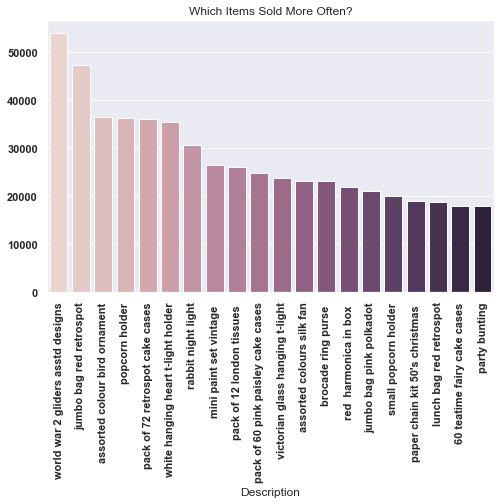

In [19]:
# Now , return back to our first question
items = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False)[:20]
sns.barplot(items.index, items.values, palette=sns.cubehelix_palette(20))
plt.title("Which Items Sold More Often?");
plt.xticks(rotation=90);


**Note:<br> if u look to other's people answers , u will see something like that 
df['Description'].value_counts().sort_values(ascending = False) , and it is horrible, but why ? because they are looking to the frequency of each product , and it is obviously wrong , may be we find just 1 row with a description of Milk and the quantity of the milk is , say 5000 , so we can not only consider just the frequency of the product :)**

### Moving to Question 2:
According to each Country, What is the (Average) Invoice

In [20]:
# We Need To make Extra Column called (Sales)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
359871,568200,PADS,pads to match all cushions,1,9/25/2011 14:58,0.001,16198,United Kingdom
279045,561226,PADS,pads to match all cushions,1,7/26/2011 10:13,0.001,15618,United Kingdom
361741,568375,BANK CHARGES,bank charges,1,9/26/2011 17:01,0.001,13405,United Kingdom
157195,550193,PADS,pads to match all cushions,1,4/15/2011 9:27,0.001,13952,United Kingdom
108088,C545478,D,discount,-720,3/3/2011 11:08,0.010,16422,United Kingdom


In [21]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
359871,568200,PADS,pads to match all cushions,1,9/25/2011 14:58,0.001,16198,United Kingdom,0.001
279045,561226,PADS,pads to match all cushions,1,7/26/2011 10:13,0.001,15618,United Kingdom,0.001
361741,568375,BANK CHARGES,bank charges,1,9/26/2011 17:01,0.001,13405,United Kingdom,0.001
157195,550193,PADS,pads to match all cushions,1,4/15/2011 9:27,0.001,13952,United Kingdom,0.001
108088,C545478,D,discount,-720,3/3/2011 11:08,0.010,16422,United Kingdom,-7.200
...,...,...,...,...,...,...,...,...,...
15016,C537630,AMAZONFEE,amazon fee,-1,12/7/2010 15:04,13541.330,n,United Kingdom,-13541.330
43703,C540118,AMAZONFEE,amazon fee,-1,1/5/2011 9:57,16453.710,n,United Kingdom,-16453.710
43702,C540117,AMAZONFEE,amazon fee,-1,1/5/2011 9:55,16888.020,n,United Kingdom,-16888.020
524602,C580605,AMAZONFEE,amazon fee,-1,12/5/2011 11:36,17836.460,n,United Kingdom,-17836.460


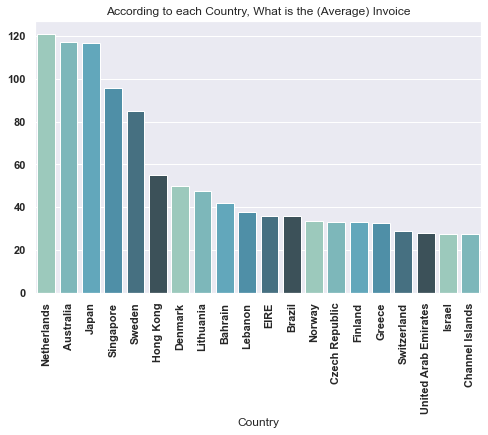

In [22]:
# we could include the negative sales with us , but it will not express the population , because it is just a fees
# or any damaged products or any discounts , here we are just assuming
countries = df[df['Sales']>0].groupby('Country')['Sales'].mean().sort_values(ascending = False)[:20]
sns.barplot(countries.index, countries.values, palette=sns.color_palette("GnBu_d"))
plt.title("According to each Country, What is the (Average) Invoice");
plt.xticks(rotation=90);


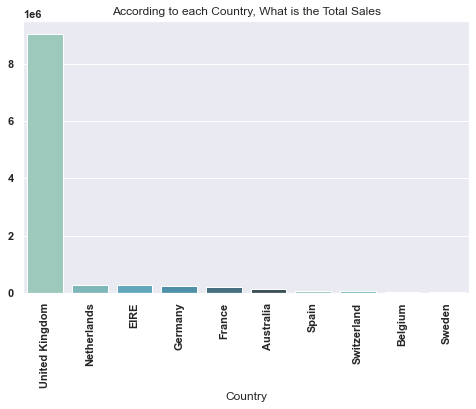

In [23]:
# We could also look at total sales in each country
countries = df[df['Sales']>0].groupby('Country')['Sales'].sum().sort_values(ascending = False)[:10]
sns.barplot(countries.index, countries.values, palette=sns.color_palette("GnBu_d"))
plt.title("According to each Country, What is the Total Sales");
plt.xticks(rotation=90);

### Moving To Question 3 : 
From Where The Most Data Comes

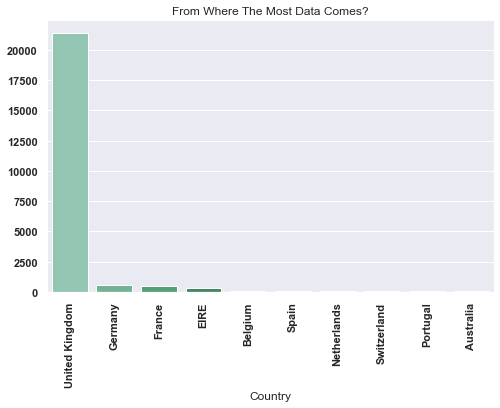

In [24]:
data_flow = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False)[:10]
sns.barplot(data_flow.index, data_flow.values, palette=sns.color_palette("BuGn_d"))
plt.title("From Where The Most Data Comes?");
plt.xticks(rotation=90);

In [25]:
# Seems Like United Kingdom is an Outiler , Like we Knew that the Most of (Anything) comes from it 
# if u need to look to the raw data , here it is the first 10 rows
data_flow

Country
United Kingdom    21391
Germany             603
France              461
EIRE                360
Belgium             119
Spain               105
Netherlands         100
Switzerland          74
Portugal             71
Australia            69
Name: InvoiceNo, dtype: int64

### Moving to Question 4 :
Which Stock_Code Used the most

In [26]:
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending = False)[:10]

StockCode
85123A    2240
22423     2168
85099B    2132
47566     1705
20725     1608
84879     1467
22720     1458
22197     1442
21212     1334
22383     1305
Name: InvoiceNo, dtype: int64

In [27]:
# if we looked at just value_counts it will lead us to a wrong conclusion
df['StockCode'].value_counts()[:10]
# if u look carefully to both output u will notice that is a different output

85123A    2307
22423     2198
85099B    2156
47566     1726
20725     1639
84879     1501
22197     1476
22720     1473
21212     1385
20727     1350
Name: StockCode, dtype: int64

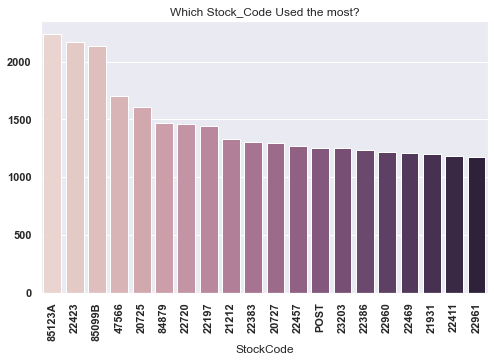

In [28]:
# if u wany to visualize it 
stock_codes = df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending = False)[:20]
sns.barplot(stock_codes.index, stock_codes.values, palette=sns.cubehelix_palette(20))
plt.title("Which Stock_Code Used the most?");
plt.xticks(rotation=90);


### Moving To Question 5 : 
what is the most Year we made money

In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
359871,568200,PADS,pads to match all cushions,1,2011-09-25 14:58:00,0.001,16198,United Kingdom,0.001
279045,561226,PADS,pads to match all cushions,1,2011-07-26 10:13:00,0.001,15618,United Kingdom,0.001
361741,568375,BANK CHARGES,bank charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom,0.001
157195,550193,PADS,pads to match all cushions,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,0.001
108088,C545478,D,discount,-720,2011-03-03 11:08:00,0.010,16422,United Kingdom,-7.200


In [30]:
df['Year'] = df['InvoiceDate'].apply(lambda x : x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x : x.month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month
359871,568200,PADS,pads to match all cushions,1,2011-09-25 14:58:00,0.001,16198,United Kingdom,0.001,2011,9
279045,561226,PADS,pads to match all cushions,1,2011-07-26 10:13:00,0.001,15618,United Kingdom,0.001,2011,7
361741,568375,BANK CHARGES,bank charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom,0.001,2011,9
157195,550193,PADS,pads to match all cushions,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,0.001,2011,4
108088,C545478,D,discount,-720,2011-03-03 11:08:00,0.010,16422,United Kingdom,-7.200,2011,3


In [31]:
sales_per_year = df.groupby('Year')['Sales'].sum().sort_values(ascending = False)
sales_per_year
# I didn't Know it was just two years :) , but u got my point

Year
2011    9020915.034
2010     748957.020
Name: Sales, dtype: float64

### Moving To Question 6:
On average what is the best month Which we do a great job in it

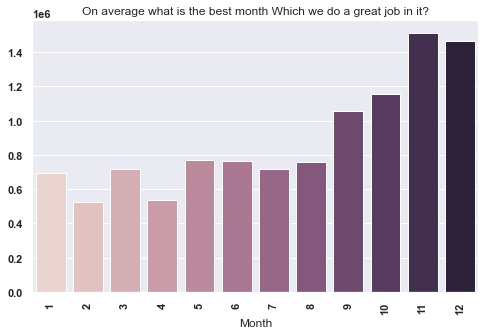

In [32]:
# if u notice in question 5 , i included the positive and negative sales because i want to know the total money 
# but in contrast, here i'm looking to the best month we doing great on it ,so i will ignore any fees 
sales_per_month = df[df['Sales']>0].groupby('Month')['Sales'].sum().sort_values(ascending = False)
sns.barplot(sales_per_month.index, sales_per_month.values, palette=sns.cubehelix_palette(12))
plt.title("On average what is the best month Which we do a great job in it?");
plt.xticks(rotation=90);


**Great Job , We Finished**